In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import copy
from math import *
import random
from tensorflow.keras.layers import Dense, Flatten


In [4]:
# Functions
def f_1(x):
    return x*sin(6*pi*x)*exp(-1 * x * x)

In [5]:
# Training Data

data_f1_x = np.array([])
data_f1_y = np.array([])

for i in range(200):
    x_f1 = random.uniform(-1, 1)
    y_f1 = f_1(x_f1)
    
    data_f1_x = np.append(data_f1_x, x_f1)
    data_f1_y = np.append(data_f1_y, y_f1)

In [6]:
# Splits

data_points = [10, 40, 80, 200]
hidden_nodes = [2, 10, 40, 100]

M = [[() for i in range(4)] for i in range(4)]

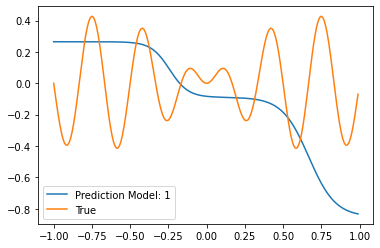

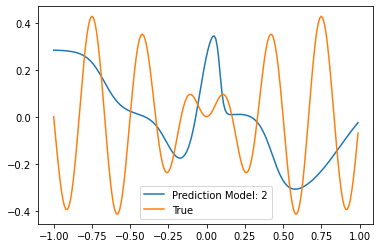

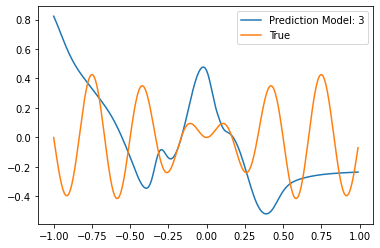

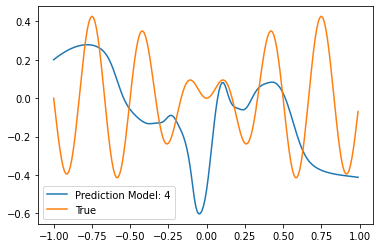

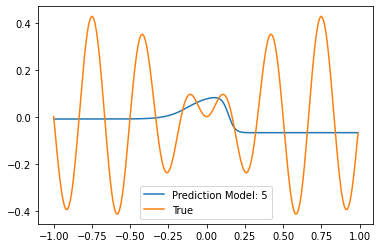

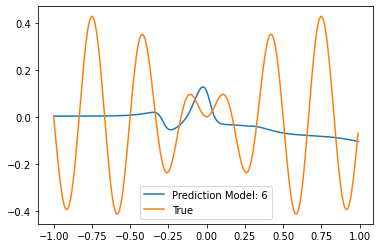

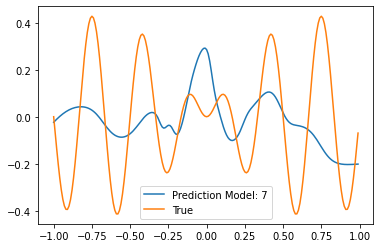

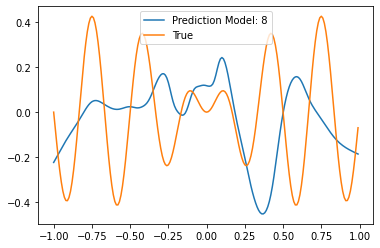

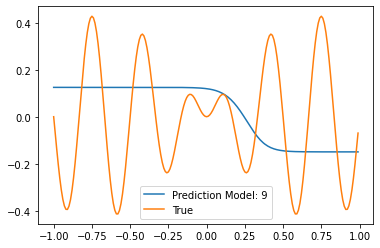

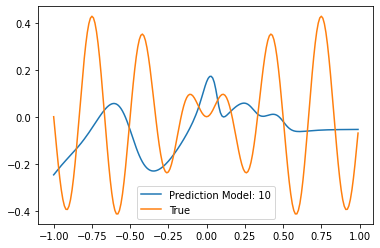

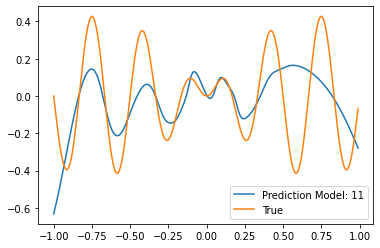

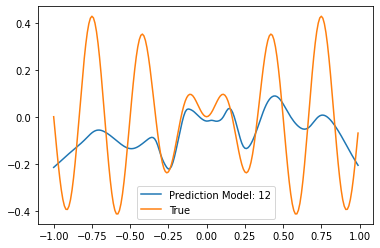

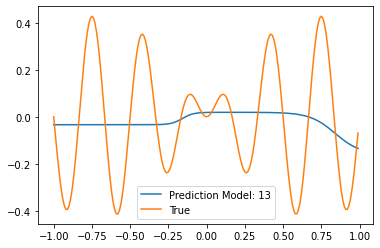

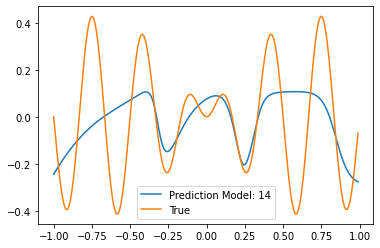

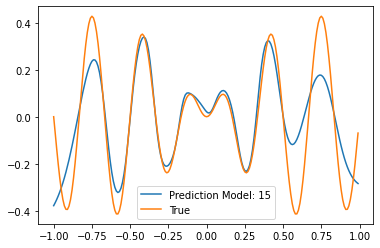

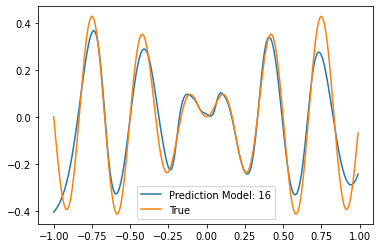

In [ ]:
# Implementation

for i_ in range(16):
    
    i = int(i_ / 4)
    j = i_ % 4
    
    num_points = data_points[i]
    num_nodes = hidden_nodes[j]
    num_train = int(num_points * 0.8)

    x = data_f1_x[:num_train]
    y = data_f1_y[:num_train]

    x_test = data_f1_x[num_train: num_points]
    y_test = data_f1_y[num_train: num_points]

    num_folds = 10

    if i == 0:
        num_folds = 2

    avg_training_error = 0
    avg_validation_error = 0

    best_model = None
    best_validation_error = 90000000
    for shuffle_count in range(5):
        
        shuffled_data = []
        for k in range(len(x)):
            shuffled_data.append((x[k], y[k]))
        
        random.shuffle(shuffled_data)
        
        shuffled_x = []
        shuffled_y = []
        
        for k in shuffled_data:
            shuffled_x.append(k[0])
            shuffled_y.append(k[1])

        k_fold_avg_training_error = 0
        k_fold_avg_validation_error = 0

        for validation_index in range(num_folds):

            paritioned_x = np.array_split(shuffled_x, num_folds)
            paritioned_y = np.array_split(shuffled_y, num_folds)

            validation_x = np.array(paritioned_x[validation_index])
            validation_y = np.array(paritioned_y[validation_index])

            training_x = np.delete(paritioned_x, validation_index, axis=0).flatten()
            training_y = np.delete(paritioned_y, validation_index, axis=0).flatten()

            mlp = keras.models.Sequential()
            mlp.add(
                Dense(num_nodes, activation="sigmoid", input_shape=(1,), 
                  kernel_initializer=keras.initializers.RandomNormal(mean=0., stddev=30), 
                  bias_initializer=keras.initializers.RandomNormal(mean=0., stddev=10)
                )
            )
            mlp.add(Dense(1, activation='linear'))
            mlp.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


            callbacks = [
                keras.callbacks.EarlyStopping(
                    # Stop training when `val_loss` is no longer improving
                    monitor="val_loss",
                    # "no longer improving" being defined as "no better than 1e-2 less"
                    min_delta=0.00001,
                    # "no longer improving" being further defined as "for at least 2 epochs"
                    patience=30,
                    verbose=0,
                )
            ]

            h = mlp.fit(x, y, epochs=500, batch_size=10, validation_data=(validation_x, validation_y), verbose=0, callbacks=callbacks)
            
            if h.history['val_loss'][-1] < best_validation_error:
                best_validation_error = h.history['val_loss'][-1]
                best_model = mlp
            
            k_fold_avg_training_error += h.history['loss'][-1]
            k_fold_avg_validation_error += h.history['val_loss'][-1]

        k_fold_avg_training_error = k_fold_avg_training_error / num_folds
        k_fold_avg_validation_error = k_fold_avg_validation_error / num_folds

        avg_training_error += k_fold_avg_training_error
        avg_validation_error += k_fold_avg_validation_error

    avg_training_error = avg_training_error / 5
    avg_validation_error = avg_validation_error / 5
    
    x_range = np.arange(start=-1, stop=1, step=0.01)
    y_predict = best_model.predict(x_range)

    plt.plot(x_range, y_predict)
    plt.plot(x_range, [f_1(x)  for x in x_range])
    plt.legend(['Prediction Model: ' + str(i_ + 1), 'True'])
    plt.show()

    M[i][j] = ((avg_training_error, avg_validation_error, best_model))
    


In [ ]:
for row in M:
    print(row)

[(0.2116553597152233, 0.21818287400528788, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9483358438>), (0.04628932708874345, 0.04232733137905598, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f947efce828>), (0.023015830456279217, 0.017181042372249065, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f948320ebe0>), (0.018706077174283565, 0.01942870642815251, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94801e2f98>)]
[(0.06194120366126299, 0.055083808617200705, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94832ded30>), (0.0560042698867619, 0.051133987051434814, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9479430828>), (0.04612922240048647, 0.0412792049581185, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94831b0ac8>), (0.042552543757483366, 0.035641803918406365, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94813531

In [ ]:
# Observe and see that the last model with 100 nodes and 200 data points had the best performance

best_model = M[3][3][2]
print(best_model)

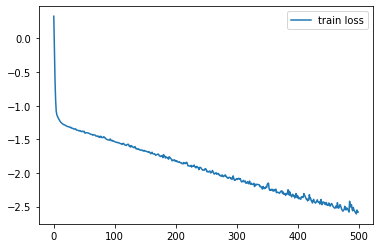

In [23]:
num_points = data_points[3]
num_nodes = hidden_nodes[3]
num_train = int(num_points * 0.8)

x = data_f1_x[:num_train]
y = data_f1_y[:num_train]

x_test = data_f1_x[num_train: num_points]
y_test = data_f1_y[num_train: num_points]

mlp_2 = keras.models.Sequential()
mlp_2.add(
    Dense(num_nodes, activation="sigmoid", input_shape=(1,), 
      kernel_initializer=keras.initializers.RandomNormal(mean=0., stddev=30), 
      bias_initializer=keras.initializers.RandomNormal(mean=0., stddev=10)
    )
)
mlp_2.add(Dense(1, activation='linear'))
mlp_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.00001,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=30,
        verbose=0,
    )
]

h = mlp_2.fit(x, y, epochs=500, batch_size=10, verbose=0, callbacks=callbacks)
plt.plot(np.log10(h.history['loss']))
plt.legend(['train loss', 'val loss'])

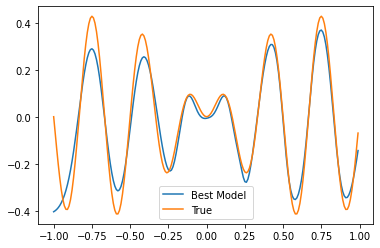

In [ ]:
x_range = np.arange(start=-1, stop=1, step=0.01)
y_predict = mlp_2.predict(x_range)

plt.plot(x_range, y_predict)
plt.plot(x_range, [f_1(x)  for x in x_range])
plt.legend(['Best Model ', 'True'])
plt.show()

In [24]:
print("Test Set Count:" , len(x_test))
print("MSE from Test Set:", mlp_2.evaluate(x_test,y_test, verbose=0)[0])

Test Set Count: 40
MSE from Test Set: 0.004466208629310131
